funcao quadritica: tem que ter a!= 0, senaoa torna-se uma funcao do primeiro grau

 representacao da funcao do segundo grau<br>
$f(x)= ax^2+bx+c$

$y=x^2-2x-3$

raizes seram onde grafico encontra seus ponto 0, para gerar a parabola<br>
C: onde o grafico corta o eixo y<br>
vertice: ponto de otimizacao da funcao maximo ou minimo, utilizamos o gradiente descentente para descobrir o menor custo(erro), para nossa 
reta de regressao atraves do conceitos de uma funcao quadratica e tambem usamos para achar maximo de lucratividade<br>


In [3]:
import numpy as np 

x = np.array([-2,-1,0,1,2])
y=(lambda X: (X**2)-(2*X)-3)(x) 
y

array([ 5,  0, -3, -4, -3])

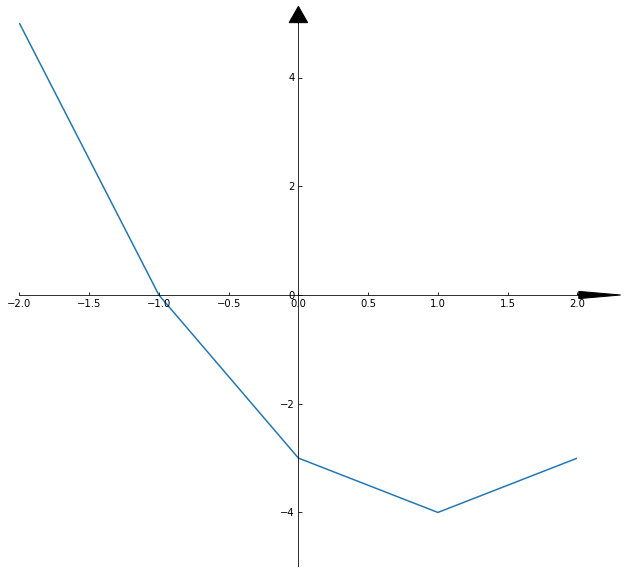

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist import SubplotZero

class Axes():
    
    def __init__(self, xlim=(-5,5), ylim=(-5,5), figsize=(12,5)):
        self.xlim = xlim
        self.ylim = ylim
        self.figsize  = figsize
        self.__scale_arrows__()
    def __drawArrow__(self, x, y, dx, dy, width, length):
        plt.arrow(
            x, y, dx, dy, 
            color       = 'k',
            clip_on     = False, 
            head_width  = self.head_width, 
            head_length = self.head_length
        ) 
        
    def __scale_arrows__(self):
        """ Make the arrows look good regardless of the axis limits """
        xrange = self.xlim[1] - self.xlim[0]
        yrange = self.ylim[1] - self.ylim[0]
        
        self.head_width  = min(xrange/30, 0.25)
        self.head_length = min(yrange/30, 0.3)
        
    def __drawAxis__(self):
        """
        Draws the 2D cartesian axis
        """
        # A subplot with two additional axis, "xzero" and "yzero"
        # corresponding to the cartesian axis
        ax = SubplotZero(self.fig, 1, 1, 1)
        self.fig.add_subplot(ax)
        
        # make xzero axis (horizontal axis line through y=0) visible.
        for axis in ["xzero","yzero"]:
            ax.axis[axis].set_visible(True)
        # make the other axis (left, bottom, top, right) invisible
        for n in ["left", "right", "bottom", "top"]:
            ax.axis[n].set_visible(False)
            
        # Plot limits
        plt.xlim(self.xlim)
        plt.ylim(self.ylim)
        # Draw the arrows
        self.__drawArrow__(self.xlim[1], 0, 0.01, 0, 0.3, 0.2) # x-axis arrow
        self.__drawArrow__(0, self.ylim[1], 0, 0.01, 0.2, 0.3) # y-axis arrow
        
        
    def draw(self):
        # First draw the axis
        self.fig = plt.figure(figsize=self.figsize)
        self.__drawAxis__()


axes = Axes(xlim=(max(x)*-1,max(x)), ylim=(max(y)*-1,max(y)), figsize=(10,10))
axes.draw()
plt.plot(x,y)

$ax^2+bx+c=0$

$x^2-5x+6$<br>
a=1<br>
b=-5<br>
c=6

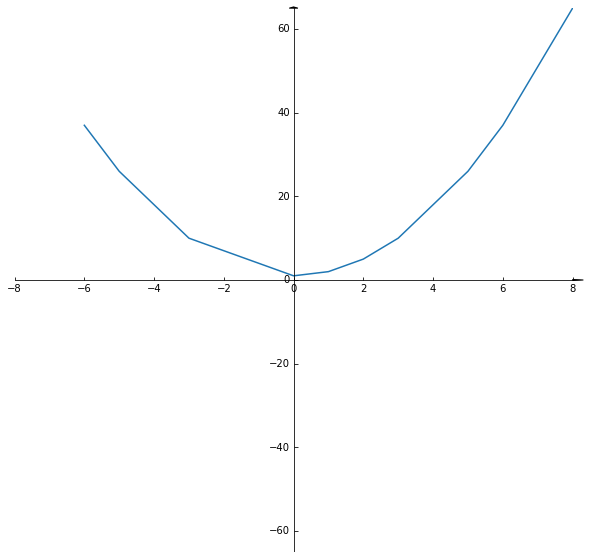

In [10]:

# delta>0: concava para cima
# delta<0: concava para baixo
# delta =0: raizes iguais
# delta <0 : nao temos raizes, o grafico foge dos pontos de intercptacao pois sao numeros complexos, nao tem raiz

def baskhara(a,b,c):
    x1=0
    x2=0
    delta = (b ** 2) - 4 * a * c
    if delta < 0:
        return x1,x2
    else:
        x1 = (-b + delta ** (1 / 2)) / (2 * a)
        x2 = (-b - delta ** (1 / 2)) / (2 * a)
    return x1,x2
    
raizes = baskhara(1,-5,6) # nescessario para encontrar o ponto de interceptacao 
x = np.array([1,-5,6,3,0,5,-6,2,1,8,3,-3])# crescimento progressivo, pa
x.sort()# preciso ordenar, para criar a funcao de modo que ela seja linear
y = x**2-5+6 

axes = Axes(xlim=(max(x)*-1,max(x)), ylim=(max(y)*-1,max(y)), figsize=(10,10))
axes.draw()
plt.plot(x,y)

$x^2-5x+6$<br>

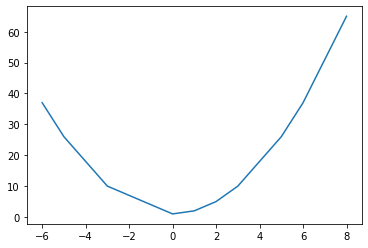

In [11]:
plt.plot(x,y)

$Xv = -b/2a $<br>
$ y= △/4a$

In [7]:
a,b,c=1,-5,6
delta = (b ** 2) - 4 * a * c
vx = (-b)/(2*a)
vy = -delta/(4*a)
vx,vy

(2.5, -0.25)

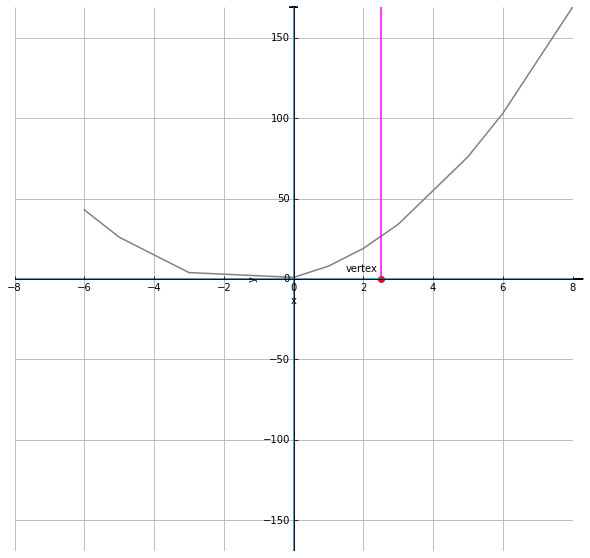

In [8]:
axes = Axes(xlim=(max(x)*-1,max(x)), ylim=(max(y)*-1,max(y)), figsize=(10,10))
axes.draw()
plt.plot(x,y,color="grey")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.axhline()
plt.axvline()

sx = [vx, vx]
sy = [min(y), max(y)]

plt.plot(sx,sy, color='magenta')

plt.scatter(vx,vy, color="red")
plt.annotate('vertex',(vx, vy), xytext=(vx - 1, (vy + 5)* np.sign(a)))

plt.show()

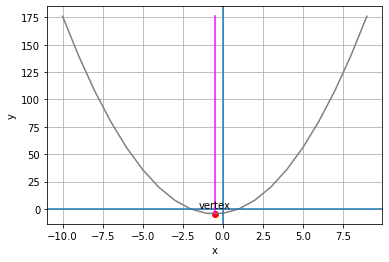

In [9]:

def plot_parabola(a, b, c):
    import pandas as pd
    import numpy as np
    from matplotlib import pyplot as plt
    
    # get the x value for the line of symmetry
    vx = (-1*b)/(2*a)
    
    # get the y value when x is at the line of symmetry
    vy = a*vx**2 + b*vx + c

    # Create a dataframe with an x column containing values from x-10 to x+10
    minx = int(vx - 10)
    maxx = int(vx + 11)
    df = pd.DataFrame ({'x': range(minx, maxx)})

    # Add a y column by applying the quadratic equation to x
    df['y'] = a*df['x']**2 + b *df['x'] + c

    # get min and max y values
    miny = df.y.min()
    maxy = df.y.max()

    # Plot the line
    plt.plot(df.x, df.y, color="grey")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.axhline()
    plt.axvline()

    # plot the line of symmetry
    sx = [vx, vx]
    sy = [miny, maxy]
    plt.plot(sx,sy, color='magenta')

    # Annotate the vertex
    plt.scatter(vx,vy, color="red")
    plt.annotate('vertex',(vx, vy), xytext=(vx - 1, (vy + 5)* np.sign(a)))

    plt.show()


plot_parabola(2, 2, -4) 